# Regression

## Linear Regression

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [107]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Analysing the data and searching for patterns and useful data...

In [108]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [109]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [110]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Selecting only those columns which influence dependent variable...

In [111]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Plotting the useful columns v/s dependent variable and analysing their nature...

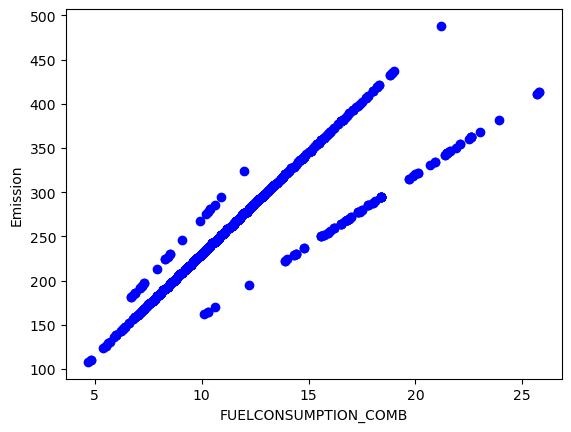

In [112]:
# we are plotting above useful columns vs co2 emission...
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

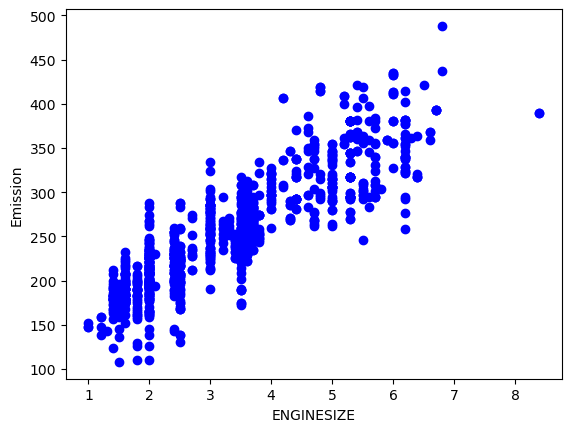

In [113]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

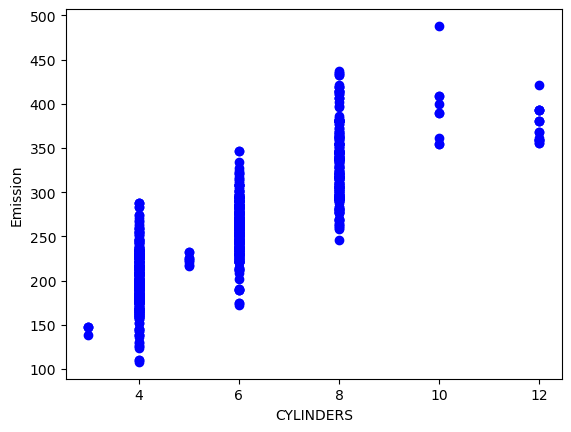

In [114]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [115]:
# If we want to build a model with only one independent variable then choose that variable and then use following line.
# x = df[['ENGINESIZE']]
# For multiple variables use following...
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df["CO2EMISSIONS"]

### Splitting data into train and test data...

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2,test_size=0.2,shuffle=True)

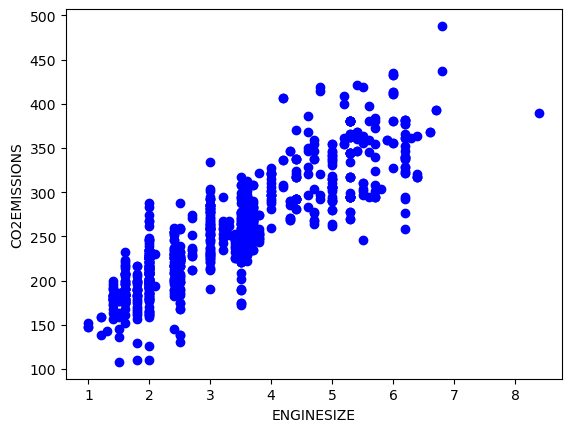

In [117]:
plt.scatter(x_train["ENGINESIZE"], y_train, color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Training model on train data and printing intercept and slope (/weights).

In [118]:
regression = LinearRegression()
regression.fit(x_train, y_train)

print ('Coefficients: ', regression.coef_)
print ('Intercept: ', regression.intercept_)

Coefficients:  [11.63291754  7.01508244  9.25865957]
Intercept:  69.05949122332129


### Predicting the outputs using trained model and plotting it with test dependent variable.

In [119]:
y_pred = regression.predict(x_test)

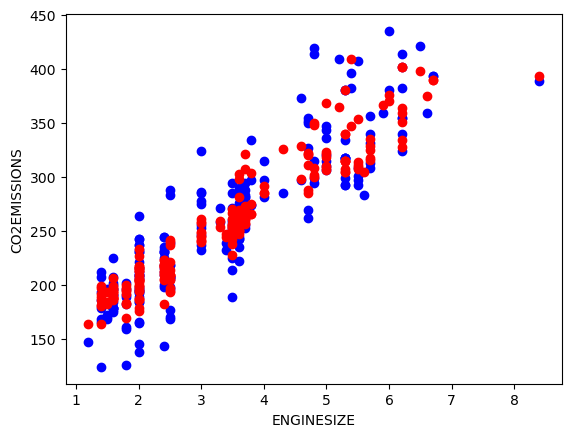

In [120]:
plt.scatter(x_test["ENGINESIZE"], y_test, color="blue")
plt.plot(x_test["ENGINESIZE"], y_pred,"ro")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Testing the accuracy of our model...
### Greater the r2 score, higher is the accuracy. Highest r2_score is 1.

In [121]:
from sklearn.metrics import r2_score

mean = np.mean(np.absolute(y_test - y_pred))
print("Mean error: ", mean)
square_mean = np.mean((y_test - y_pred)**2)
root_mean_square = square_mean**0.5
print("RMS error: ", root_mean_square)

print("R2_score: ", r2_score(y_test, y_pred))

Mean error:  16.132545872637003
RMS error:  22.44687025844574
R2_score:  0.8911902906366301


# Non-linear Regression...
### Using non-linear Regression on the same above data to compare which model fits the best...

In [122]:
from sklearn.preprocessing import PolynomialFeatures

x = df[['ENGINESIZE']]
y = df["CO2EMISSIONS"]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2,test_size=0.2,shuffle=True)

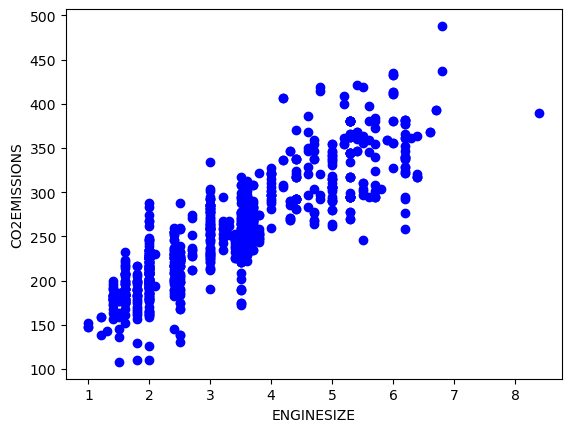

In [123]:
plt.scatter(x_train["ENGINESIZE"], y_train, color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()


## Polynomial Regression... Using a Polynomial

### "fit_transform" takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2). Now we can use linear regression model on this... 
### Else everything same as above...

In [124]:
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train) 
x_train_poly

array([[  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   1.   ,   1.   ,   1.   ],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       ...,
       [  1.   ,   5.7  ,  32.49 , 185.193],
       [  1.   ,   2.4  ,   5.76 ,  13.824],
       [  1.   ,   3.7  ,  13.69 ,  50.653]])

In [125]:
poly_linear_regr = LinearRegression()
poly_linear_regr.fit(x_train_poly,y_train)

print ('Coefficients: ', poly_linear_regr.coef_)
print ('Intercept: ',poly_linear_regr.intercept_)

Coefficients:  [ 0.         31.28798272  3.78723892 -0.44920696]
Intercept:  128.04102733668998


In [126]:
x_test_poly = poly.transform(x_test)
y_poly_predi = poly_linear_regr.predict(x_test_poly)

print("r2_score: ", r2_score(y_test,y_poly_predi))

r2_score:  0.7956338789228554


# Non-linear Regression... Using any arbitrary function...

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
df = pd.read_csv("china_gdp.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [129]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [130]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### first lets examine the data by plotting it...

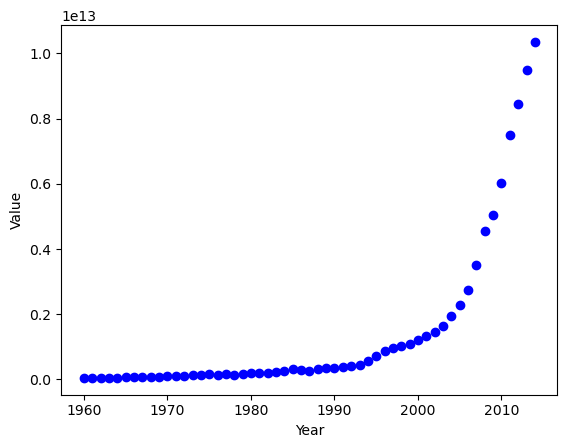

In [131]:

plt.scatter(df["Year"],df["Value"],color="blue")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


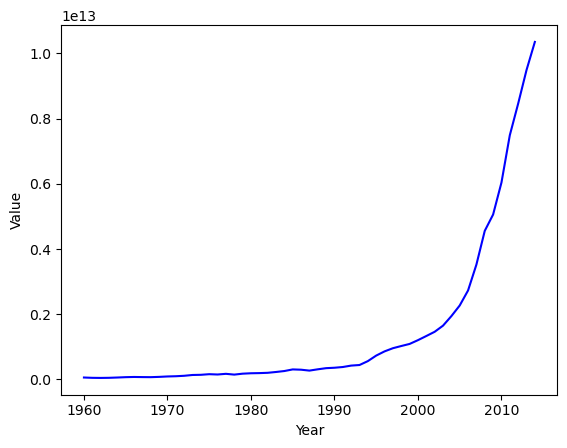

In [132]:
plt.plot(df["Year"],df["Value"],color="blue")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

### from the data plots we conclude that we have to use non-linear regression here...
#### first lets split the data...

In [133]:

from sklearn.model_selection import train_test_split

x = df["Year"]
y = df["Value"]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101,test_size=0.2,shuffle=True)

### by analysing the graph we should choose a function...
#### here sigmoid function is good to use...

In [134]:
import math as m

def sigmoid(x,a,b,c,d):
    y = a/(1+b*((m.e)**(c*(x-d))))
    return y

### lets normalize the data (divide everything by max value) and find best values of constants

In [135]:

x_n_train = x_train/max(x_train)
y_n_train = y_train/max(y_train)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_n_train, y_n_train)

print("sigmoid function constants: ", popt)


sigmoid function constants:  [   4.77124169    0.58591575 -345.70374189    1.00525345]


### normalizing whole data and then plotting...

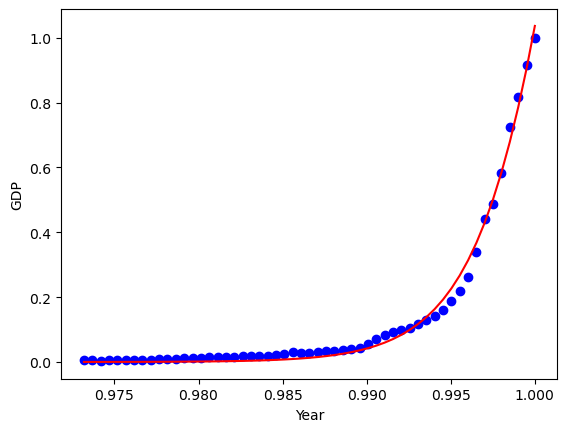

In [136]:

x_graph = x/max(x)
y_graph = y/max(y)
y_predict = sigmoid(x_graph,*popt)

plt.scatter(x_graph,y_graph,color="blue")
plt.plot(x_graph,y_predict,color="red")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

### Testing the accuracy of our model...

r2_score:  0.9243225792343324


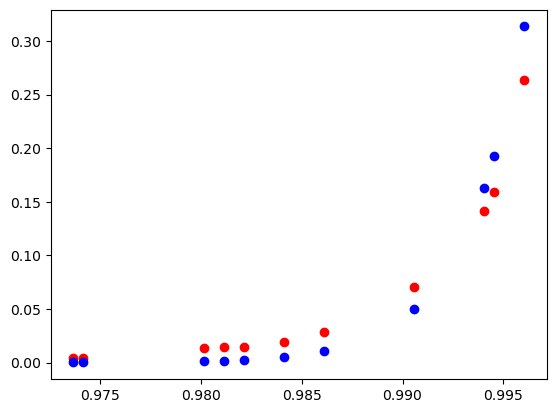

In [137]:
from sklearn.metrics import r2_score

x_test_graph = x_test/max(x)
y_test_graph = y_test/max(y)

y_predict_test = sigmoid(x_test_graph,*popt)

print("r2_score: ", r2_score(y_test_graph,y_predict_test))

plt.plot(x_test_graph,y_test_graph,"ro")
plt.plot(x_test_graph,y_predict_test,"bo")